In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
text = pd.read_csv('data/trainPreprocessed.csv')

In [ ]:
# turn the processed column into an array of words
text['processed'] = text['processed'].apply(lambda x: x.split())

In [ ]:
text.head()

,overall,processed
0,5,"[love, glitter, pens, sparkle, delightfully, p..."
1,5,"[works, well, machine, use, mostly, cones]"
2,5,"[great, assortment, colors, though, lot, pinks..."
3,5,[looking]
4,5,"[make, 400, birds, hospital, month]"


<a id = 'topicModelling'></a>
[Back to Table of Contents](#home)
## F. Topic Modelling of High and Low Ratings
Examine the 5-star reviews and the 1-star reviews separately. Categorize each review into a set of topics (10 - 20 topics). Can you infer any particular observations regarding the topics discussed in the highly rated reviews vs the lowly rated reviews? Document any other observations you have gained with this analysis. You may use a smaller subset of the reviews to better demonstrate your findings.

In [ ]:
#PyLDAvis

from gensim import corpora
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
pyLDAvis.enable_notebook()

def pyLDAvisualization(inp, n=10, p=10):
  # Create a dictionary representation of the documents
  dictionary = corpora.Dictionary(inp)
  # Convert dictionary into a BoW
  corpus = [dictionary.doc2bow(text) for text in inp]

  #LDA model
  lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=n, passes=p)

  #generating visualization
  vis = gensimvis.prepare(lda_model, corpus, dictionary)
  return vis

In [ ]:
n15p10 = pyLDAvisualization(text['processed'], 15, 10)

In [ ]:
pyLDAvis.display(n15p10)

Topics breakdown and interpretation
- 1 : The reviews dont seem to be regarding a specific product, but the product(s) may be on the higher end in terms of pricing.
      In general the consumers seem to be unhppy with the pricing of the product(s).
- 2 : The reviews seem to be describing faults, damage, defects or issues with the delivered product(s).
      
- 3 : The reviews are describing coloring tools (pens, markers, pencils) and the qualities of the coloring tools.
      The words "Bright", "Vibrant", "Glitter" are used frequently.
      Indicating a mostly positive sentiment.
- 4 : The reviews are describing cutting tools (scissors, knives) and the qualities of the cutting tools.
      The words "Sharp", and "Easy" have notable appearances.
      Indicating a mostly positive sentiment.
- 5 : The reviews seem to be describing the quality of a glue product.
      The words mentioned (fabric, clay, sticks, etc) may indicate what that glue was used for.
      The word "cool" is also very exclusive to this topic, which is in line with the context which is glue guns.
- 6 : The reviews are descibing decorative items such as stickers and tape.  
      The prominence of the word christmas indicates that these products were purchased around the holiday season.
      The words "great", "loved", and "fun" indicate a postive sentiment.
- 7 : This topic revolves around painting tools for example brushes, paint, etc . The topic seems neutral, with no clear sentiment.
- 8 : This topic doesnt revolve around a specific topic, instead it appears to be about praising a product for its great value to price ratio.
- 9 : Knitting tools are the main focus of this topic. The words nice and easy are notable giving the impression of a positive sentiment.
- 10 : This topic doesnt revolve around a specific topic, instead it appears to be about praising a good product for its great value to price ratio. This topic has a highly  
       notable positive sentiment.
- 11 : The reviews are describing mostly little personal decorative items such as earrings and bracelets. This is indicated by the words "earrings", "beads", "wire", etc.
       The words "nice" and "pretty" are also used frequently which indicates a positive sentiment.
- 12 : This topic revolves around sewing machines and sewing tools. The words "sewing", "machine", "thread", "needles" are used frequently.
       The topic seems neutral.
- 13 : This topic describes decorated postal equipment such as cards and stamps. This is concluded by the words "die", and "embossing".
       The words "perfect", and "needed" indicate a positive sentiment.
- 14 : This topic is unusual and vague. On one hand it may describe scrapbooking activities and tools, but on the other hand it may positively describe th delivery of the     
       product and the initial impressions.
- 15 : This topic doesnt appear to be unique to a specific genre of products, it seems to be a collective of all the positive sentiment reviews.

##Wordcloud
We start off with initial visualization and manual removal of common words with no meaning

#### Taking All reviews with rating above 4, inclusive

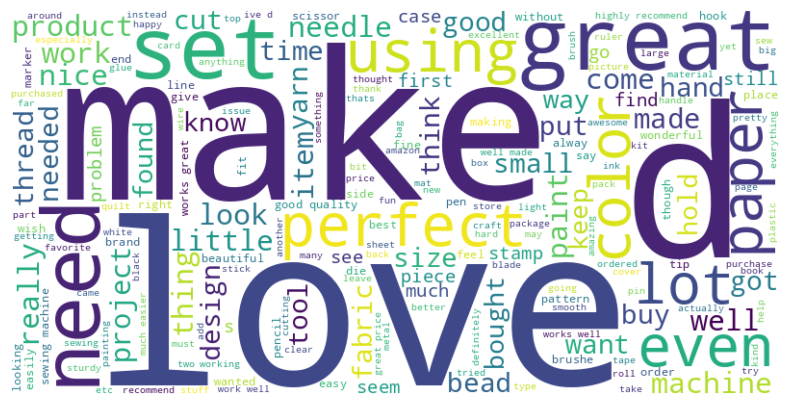

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example positive sentiment words
all_words = text[text['overall'] >= 4]['processed'].array
text_string = ''
for i in all_words:
  text_string += ' '.join(i)
text_string = (text_string.replace('one','').replace('use',''))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_string)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

freq_4 = Counter(text_string.split()).most_common()
print(freq_4)

#### Words with rating equal to 3

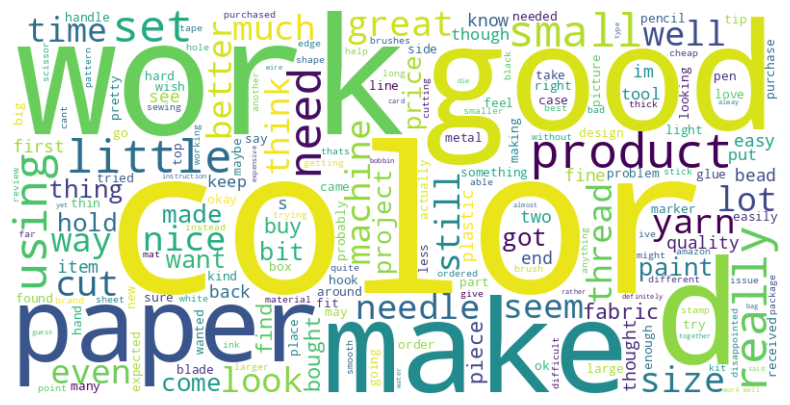

[('would', 3987), ('like', 3880), ('get', 3083), ('good', 2884), ('work', 2583), ('well', 2364), ('d', 2242), ('paper', 2096), ('really', 2089), ('much', 1994), ('color', 1935), ('little', 1932), ('im', 1859), ('colors', 1794), ('great', 1777), ('make', 1753), ('small', 1732), ('using', 1706), ('product', 1704), ('time', 1660), ('also', 1628), ('better', 1619), ('quality', 1561), ('yarn', 1535), ('nice', 1498), ('machine', 1420), ('cut', 1402), ('price', 1398), ('size', 1374), ('even', 1331), ('set', 1297), ('however', 1295), ('bit', 1281), ('still', 1261), ('need', 1256), ('could', 1150), ('way', 1141), ('lot', 1139), ('made', 1120), ('thread', 1106), ('hard', 1102), ('think', 1090), ('fine', 1075), ('enough', 1069), ('find', 1059), ('i', 1055), ('it', 1024), ('buy', 1020), ('see', 1008), ('sure', 1005), ('ive', 1000), ('got', 1000), ('want', 991), ('plastic', 990), ('first', 983), ('something', 971), ('two', 966), ('back', 954), ('pretty', 947), ('bought', 946), ('thought', 945), ('l

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example positive sentiment words
all_words = text[text['overall'] == 3]['processed'].array
text_string = ''
for i in all_words:
  text_string += ' '.join(i)
text_string = (text_string.replace('one','').replace('use',''))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_string)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

freq_3 = Counter(text_string.split()).most_common()
print(freq_3)

#### Words with rating less than and equal to 2

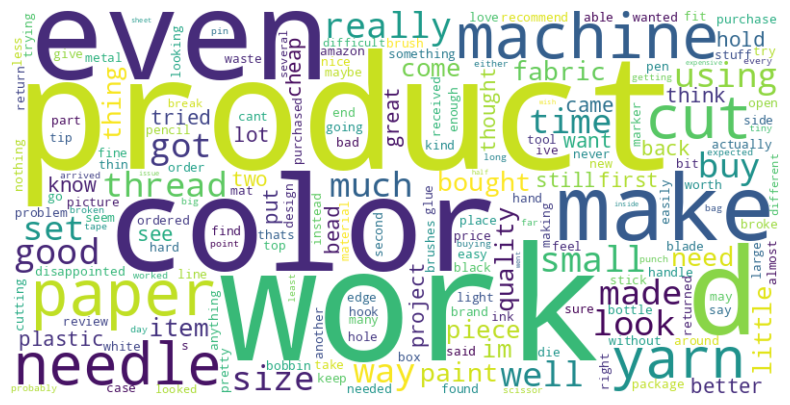

[('would', 4252), ('like', 3535), ('get', 3292), ('work', 2520), ('even', 2479), ('product', 2252), ('d', 2182), ('paper', 2123), ('time', 2084), ('good', 1948), ('yarn', 1843), ('much', 1814), ('machine', 1792), ('quality', 1788), ('cut', 1775), ('im', 1739), ('really', 1725), ('well', 1719), ('color', 1627), ('buy', 1567), ('using', 1517), ('made', 1509), ('make', 1500), ('small', 1490), ('my', 1485), ('also', 1423), ('better', 1420), ('way', 1404), ('back', 1390), ('got', 1345), ('could', 1325), ('thread', 1300), ('bought', 1297), ('tried', 1271), ('first', 1269), ('size', 1260), ('plastic', 1181), ('colors', 1175), ('set', 1139), ('two', 1134), ('great', 1121), ('it', 1112), ('little', 1103), ('ive', 1101), ('fabric', 1100), ('i', 1099), ('disappointed', 1073), ('2', 1072), ('paint', 1031), ('hard', 1025), ('cant', 989), ('thought', 987), ('see', 986), ('different', 982), ('never', 957), ('something', 952), ('still', 943), ('waste', 937), ('price', 924), ('needles', 923), ('want', 

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example positive sentiment words
all_words = text[text['overall'] <= 2]['processed'].array
text_string = ''
for i in all_words:
  text_string += ' '.join(i)
text_string = (text_string.replace('one','').replace('use',''))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_string)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

freq_2 = Counter(text_string.split()).most_common()
print(freq_2)

### Refining our visualization
We found the common words between all the 3 lists of words and used the euclidean distance formula on their frequencies to find their distance from each other. Following that, we removed the common words which were closest in frequencies and visualized the words using wordcloud again.

In [ ]:
import math
def calculate_distance(a, b, c):
    distance = math.sqrt((a - b)**2 + (b - c)**2 + (c - a)**2)
    return distance

In [ ]:
big_lis = []

In [ ]:
for i in freq_4[:1000]:
  for j in freq_3[:1000]:
    for k in freq_2[:1000]:
      if(i[0]==j[0] and i[0]==k[0]):
        dif = calculate_distance(i[1],j[1],k[1])
        tup = (i[0], dif)
        big_lis.append(tup)

In [ ]:
big_lis[:100]

[('great', 71750.38084916344),
 ('like', 40520.12880038759),
 ('well', 41629.92219545936),
 ('good', 39765.82756588878),
 ('love', 38991.16410162692),
 ('d', 35293.19016467624),
 ('would', 30260.96102241302),
 ('easy', 34600.16910363301),
 ('colors', 30528.85032227712),
 ('make', 30245.251428943353),
 ('product', 29089.63127989078),
 ('quality', 29417.662959521444),
 ('work', 27855.1642967691),
 ('get', 26757.437881830167),
 ('color', 28003.969290084577),
 ('little', 27196.60776641087),
 ('nice', 27312.29485048812),
 ('really', 25001.613867908607),
 ('paper', 24134.284203182822),
 ('price', 25439.84131239816),
 ('set', 24779.191431521733),
 ('time', 23326.162650551847),
 ('using', 23424.055882788532),
 ('much', 22819.40073709211),
 ('machine', 21623.882953808272),
 ('size', 20680.516241138663),
 ('also', 20051.584725402627),
 ('works', 21009.105502138827),
 ('perfect', 21405.03711746373),
 ('im', 19170.22821982044),
 ('yarn', 18634.667906887957),
 ('made', 19033.499993432633),
 ('need'

In [ ]:
sorted_data = sorted(big_lis, key=lambda x: x[1])

In [ ]:
sorted_data[:100]

[('ended', 701.3002210180744),
 ('ok', 802.9296357714043),
 ('spend', 815.2140823121249),
 ('stuck', 819.0103784446202),
 ('guess', 828.3513747196898),
 ('unless', 835.3059319794155),
 ('rough', 838.4127861620432),
 ('disappointed', 841.0743130068829),
 ('supposed', 845.9184357844437),
 ('description', 849.6316849082313),
 ('shows', 880.0318176066136),
 ('kept', 887.7172973418959),
 ('sort', 894.0212525438084),
 ('bend', 895.4027026986238),
 ('thinking', 901.6529265743),
 ('per', 907.2585078135118),
 ('dried', 918.3114939931875),
 ('resin', 918.963546611072),
 ('tension', 923.2410302840749),
 ('push', 929.3104970891053),
 ('rest', 938.5105220507653),
 ('brown', 944.6978352891468),
 ('giving', 947.8396488858228),
 ('print', 949.3197564572224),
 ('head', 951.4063274963016),
 ('pictured', 952.0808789173324),
 ('version', 953.7116964785532),
 ('stop', 955.4778909006739),
 ('50', 962.6754385565262),
 ('paid', 968.0010330573),
 ('later', 968.0919377827707),
 ('matter', 969.3925933284203),
 (

Words like disappointed might indicate that it is negative, but it could also be in the higher rated reviews

In [ ]:
frequent_meaningless_words = [item[0] for item in sorted_data[:100]]

In [ ]:
frequent_meaningless_words

['ended',
 'ok',
 'spend',
 'stuck',
 'guess',
 'unless',
 'rough',
 'disappointed',
 'supposed',
 'description',
 'shows',
 'kept',
 'sort',
 'bend',
 'thinking',
 'per',
 'dried',
 'resin',
 'tension',
 'push',
 'rest',
 'brown',
 'giving',
 'print',
 'head',
 'pictured',
 'version',
 'stop',
 '50',
 'paid',
 'later',
 'matter',
 'process',
 'designed',
 'pay',
 'middle',
 'liquid',
 'suggest',
 'entire',
 'mark',
 'separate',
 'backing',
 'as',
 'bottles',
 'leaves',
 'which',
 'smell',
 'is',
 'skein',
 'outside',
 '15',
 'means',
 'within',
 'check',
 'today',
 'center',
 'bristles',
 'cap',
 'guide',
 'ball',
 'steel',
 'knew',
 'eyes',
 'apart',
 'powder',
 'stiff',
 'gotten',
 'snap',
 'purple',
 'plate',
 'except',
 'cardboard',
 'do',
 'not',
 'totally',
 'mess',
 'children',
 'opinion',
 'coming',
 'allow',
 'wooden',
 'wool',
 'shiny',
 'tubes',
 'figure',
 'given',
 'thinner',
 'trouble',
 'original',
 'replacement',
 'inches',
 'deep',
 'directions',
 'person',
 'skeins',

In [ ]:
def remove_words_from_string(text, words_to_remove):
    words = text.split()
    filtered_words = [word for word in words if word not in words_to_remove]
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

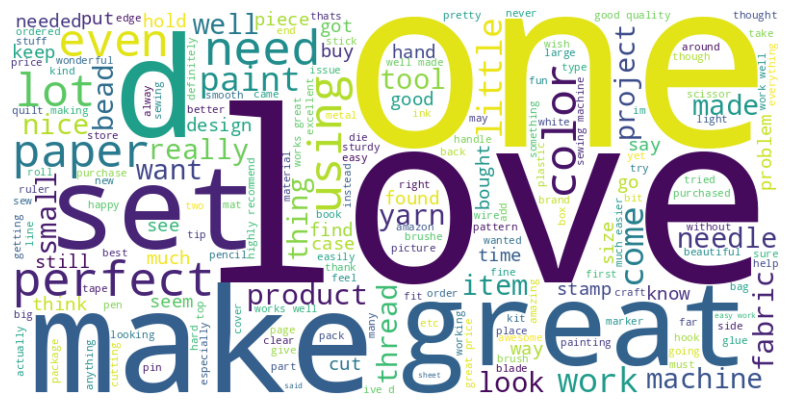

In [ ]:
all_words = text[text['overall'] >= 4]['processed'].array
all_words_string = ''
for i in all_words:
  all_words_string += ' '.join(i)
all_words_string = remove_words_from_string(all_words_string, frequent_meaningless_words)
all_words_string = all_words_string.replace('use','')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words_string)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

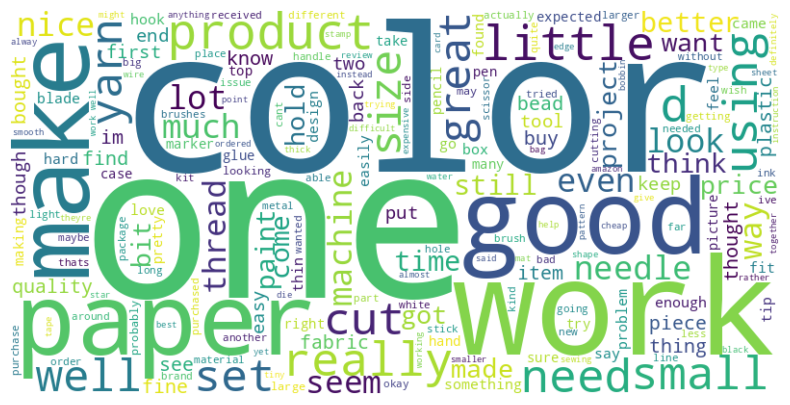

In [ ]:
all_words = text[text['overall'] == 3]['processed'].array
all_words_string = ''
for i in all_words:
  all_words_string += ' '.join(i)
all_words_string = remove_words_from_string(all_words_string, frequent_meaningless_words)
all_words_string = all_words_string.replace('use','')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words_string)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

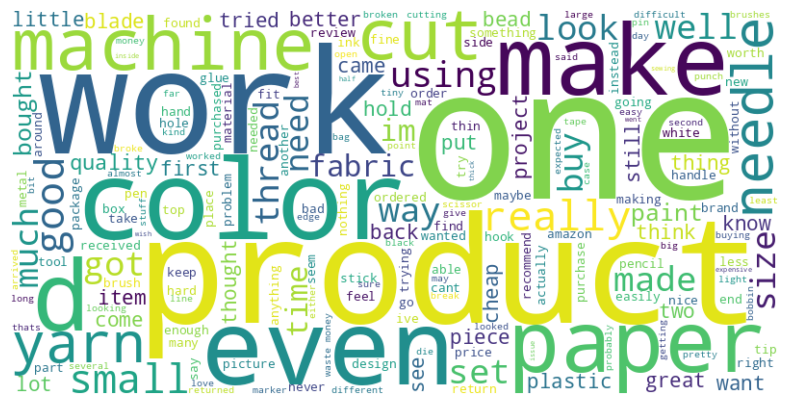

In [ ]:
all_words = text[text['overall'] <= 2]['processed'].array
all_words_string = ''
for i in all_words:
  all_words_string += ' '.join(i)
all_words_string = remove_words_from_string(all_words_string, frequent_meaningless_words)
all_words_string = all_words_string.replace('use','')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words_string)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()